# Assignment 2 <br> 
<b>Date: Nov 13th, 2022 </b><br>
<b>Name:</b> Elaheh Ekhveh<br>




<b> Part A. Static Visualization </b> <br>
* Access data from “Daily Climate Observations” from GeoMET API 
* Extract data, using Jupyter Notebook for the closest observation station to '560 Rochester St, Ottawa, ON, CA' for the entirety of 2011<br>

The data for this assignment is available online:
https://api.weather.gc.ca/collections/climate-daily/items?limit=2000&startindex=0&STATION_NAME=OTTAWA&LOCAL_YEAR=2011&PROVINCE_CODE=ON <br>

The libraries used are: json, requests, pandas, math




In [1]:
import requests
import json
import pandas as pd
from math import radians, cos, sin, asin, sqrt


to pull out the data from an API:
* connect to an API
* get the data from API
* parse the data into JSON format

In [ ]:
response_API=requests.get('https://api.weather.gc.ca/collections/climate-daily/items?limit=2000&startindex=0&STATION_NAME=OTTAWA&LOCAL_YEAR=2011&PROVINCE_CODE=ON')
data = response_API.text
parse_json=json.loads(data)
parse_json

<p> Now we try to extract the elements we need for this assignment from the JSON file:


In [3]:
long=[]
lat=[]
local_year=[]
mean_temp=[]
min_temp=[]
max_temp=[]
station_name=[]
precipitation=[]
id=[]

for feature in parse_json['features']:
    id.append(feature['id'])
    long.append(feature['geometry']['coordinates'][0])
    lat.append(feature['geometry']['coordinates'][1])
    station_name.append(feature['properties']['STATION_NAME'])
    local_year.append(feature['properties']['LOCAL_YEAR'])
    mean_temp.append(feature['properties']['MEAN_TEMPERATURE'])
    min_temp.append(feature['properties']['MIN_TEMPERATURE'])
    max_temp.append(feature['properties']['MAX_TEMPERATURE'])
    precipitation.append(feature['properties']['TOTAL_PRECIPITATION'])
#print(coordinate)

Then we convert json format to Dataframe using Pandas:

In [4]:
df = pd.DataFrame({"id":id,"station_name":station_name,"long":long, "lat":lat,"local_year":local_year,"mean_temp":mean_temp,
"min_temp":min_temp,"max_temp":max_temp,"precipitation":precipitation})
df

,id,station_name,long,lat,local_year,mean_temp,min_temp,max_temp,precipitation
0,6105976.2011.5.31,OTTAWA CDA,-75.716667,45.383333,2011,23.2,15.9,30.5,0.0
1,6105976.2011.9.29,OTTAWA CDA,-75.716667,45.383333,2011,21.3,17.4,25.2,2.7
2,6105976.2011.10.21,OTTAWA CDA,-75.716667,45.383333,2011,9.8,7.4,12.2,3.2
3,6105976.2011.9.7,OTTAWA CDA,-75.716667,45.383333,2011,15.6,12.7,18.4,0.0
4,6105976.2011.9.17,OTTAWA CDA,-75.716667,45.383333,2011,9.7,1.2,18.2,0.0
...,...,...,...,...,...,...,...,...,...
1090,6105978.2011.12.31,OTTAWA CDA RCS,-75.716667,45.383333,2011,-5.0,-7.7,-2.2,2.4
1091,6105978.2011.8.30,OTTAWA CDA RCS,-75.716667,45.383333,2011,18.9,12.2,25.5,1.3
1092,6105978.2011.10.4,OTTAWA CDA RCS,-75.716667,45.383333,2011,12.0,8.4,15.5,0.0
1093,6105978.2011.11.22,OTTAWA CDA RCS,-75.716667,45.383333,2011,-4.6,-9.6,0.5,0.0


The question mentioned that we should look for a station near to <b> '560 Rochester St, Ottawa, ON, CA' </b>
<p>  we need to define the function for measuring the distance between any two locations on the earth. for this purpose we use <b>math</b> library.

In [5]:
"""
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
"""
from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
   
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

The below function measures the nearest location of the stations to any location we are looking for using the <b> dist</b> function created above:

In [6]:
def find_nearest(lat, long):
    distances = df.apply(lambda row: dist(lat, long, row['lat'], row['long']), 
    axis=1)
    return df.loc[distances.idxmin(), 'station_name']

#find_nearest(ref_point[1], ref_point[0])

We have the longitude and latitude of the  <b> '560 Rochester St, Ottawa, ON, CA'</b>. <br>
We need to find the closes station in the dataframe using the<b>"find_nearest" </b>function to this location.<br>
The result shows all the information about the <b>closest station </b>to the location we are looking for:

In [7]:
# 560 Rochester St, Ottawa, ON, CA' location is ref_point
ref_point=[-75.70618626002958, 45.39882381496132]
df=df[df["station_name"]==find_nearest(ref_point[1], ref_point[0])]
df

,id,station_name,long,lat,local_year,mean_temp,min_temp,max_temp,precipitation
0,6105976.2011.5.31,OTTAWA CDA,-75.716667,45.383333,2011,23.2,15.9,30.5,0.0
1,6105976.2011.9.29,OTTAWA CDA,-75.716667,45.383333,2011,21.3,17.4,25.2,2.7
2,6105976.2011.10.21,OTTAWA CDA,-75.716667,45.383333,2011,9.8,7.4,12.2,3.2
3,6105976.2011.9.7,OTTAWA CDA,-75.716667,45.383333,2011,15.6,12.7,18.4,0.0
4,6105976.2011.9.17,OTTAWA CDA,-75.716667,45.383333,2011,9.7,1.2,18.2,0.0
...,...,...,...,...,...,...,...,...,...
708,6105976.2011.10.7,OTTAWA CDA,-75.716667,45.383333,2011,12.8,2.7,22.8,0.0
709,6105976.2011.9.20,OTTAWA CDA,-75.716667,45.383333,2011,17.6,13.4,21.8,0.4
710,6105976.2011.1.3,OTTAWA CDA,-75.716667,45.383333,2011,-3.9,-5.8,-2.0,0.5
711,6105976.2011.10.19,OTTAWA CDA,-75.716667,45.383333,2011,9.3,5.5,13.0,23.8


1. Create individual plots for minimum, mean and maximum temperature, and a 4th plot of all
temperatures in one plot using the subplot function and aligning the axes.

* We need to use matplotlib library

In [8]:
import matplotlib.pyplot as plt


* We can use the following code to plot each of these information in a subplot that has a layout of 2 rows and 2 columns.<br>
* We used the axes argument to specify where each column of the DataFrame should be placed.
* the subplots have the same y-axis scale, so we can use the sharey arguments



<AxesSubplot:xlabel='All Temperature'>

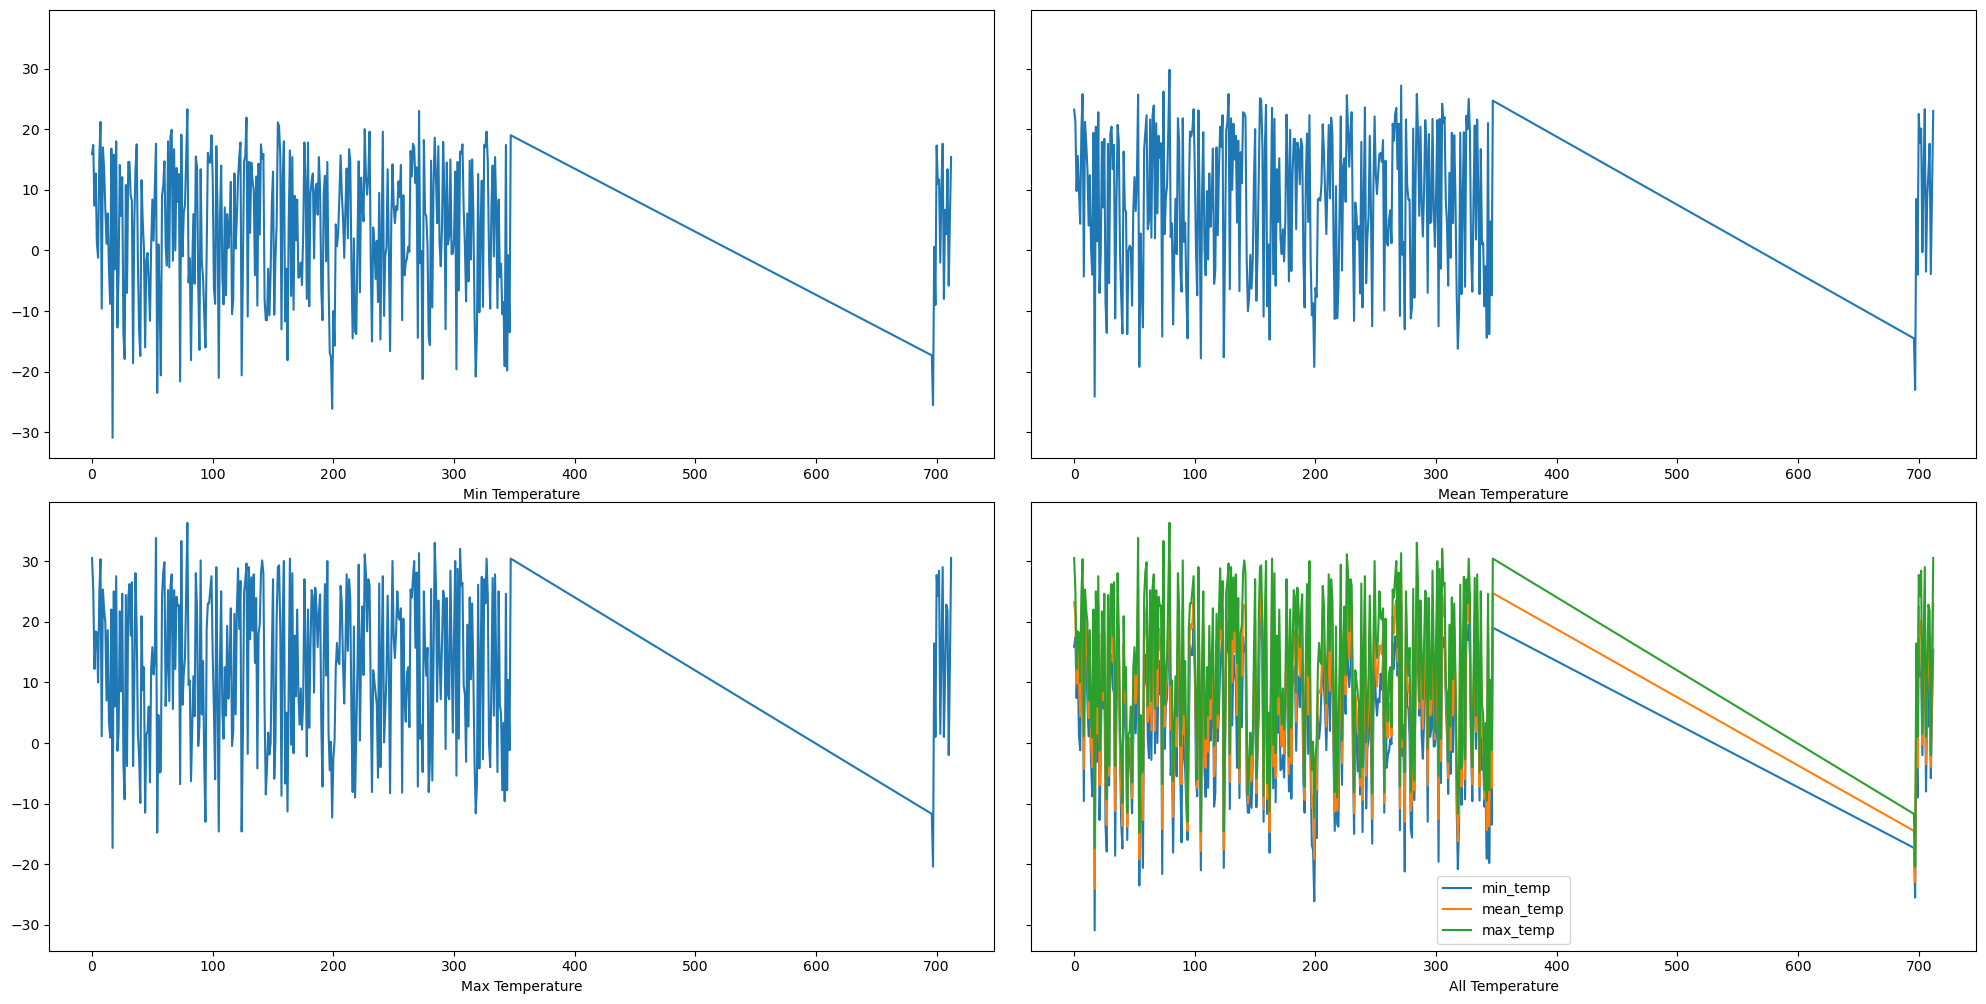

In [9]:
#define subplot layout
fig,axes = plt.subplots(figsize=(20, 10),nrows=2, ncols=2,sharey=True)
fig.tight_layout()
df['min_temp'].plot(ax=axes[0,0],xlabel='Min Temperature')
df['mean_temp'].plot(ax=axes[0,1],xlabel='Mean Temperature')
df['max_temp'].plot(ax=axes[1,0], xlabel='Max Temperature')
df.plot(y= ['min_temp','mean_temp', 'max_temp'], ax=axes[1,1], xlabel='All Temperature')

2. Plot the cumulative precipitation over the year

* We use <b>"cumsum"</b> to return the cumulative sum over the <b>precipitation</b>

<AxesSubplot:ylabel='precipitation'>

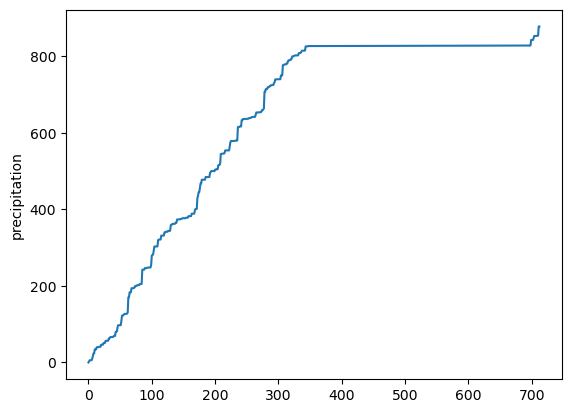

In [10]:
df['precipitation'].cumsum().plot(ylabel="precipitation")

3. Create a geographic map – plot the location of the closest observation station in a <b> folium</b> map using a custom marker with a pop up that provide some details of the station (e.g.: Station
Name, Station Number, and Latitude, Longitude). <br>


In [11]:
import folium
from folium.folium import Map
from IPython.display import HTML

We specified the longitude, latitude, and station name that we want to use in pop up for our map

In [12]:
longitude=df["long"].iloc[0]
latitude=df["lat"].iloc[0]
#latitude
station_name=df["station_name"].iloc[0]
#station_name

Use the marker with a pop up in our map:

In [13]:
m=folium.Map(location=[45.29323669934225, -75.77019197283248], zoom_start=10)
folium.Marker(
    
    location= [latitude, longitude], 
    popup=f"<b>station name:</b>{station_name}<br> <b>longitude:</b>{longitude}<br><b>latitude:</b>{latitude}",
    max_width="100",
    icon=folium.Icon(color="green"),
).add_to(m)

m

<b>Part B. Interactive Visualization </b> <br>
1. Create an interactive map in ipyleaflet, accessing two WMS services and viewing them using the Split
Map control. You can select the WMS services of your choosing. Below are links to some resources
where you can find WMS, but you are not limited to these:

In [14]:
from ipyleaflet import WMSLayer, Map, basemaps, SplitMapControl, LayersControl

WMS layers that are used for this purpose are : <br>
* US National MineralAssessment 1998
* US Active mines and mineral plants

In [15]:
m = Map(basemap=basemaps.Stamen.Terrain,center=(39.93578575262039, -102.23007815411914), zoom=4)
wms_right= WMSLayer(
    url='https://mrdata.usgs.gov/services/nmra?request=getcapabilities&service=WMS&version=1.3.0&',
    name="National Mineral Resource Assessment 1998",
    layers='USNationalMineralAssessment1998',
    opacity=0.4,
    format='image/png',
    transparent=True,
)

wms_left= WMSLayer(
    url='https://mrdata.usgs.gov/services/active-mines?request=GetCapabilities&service=WMS&version=1.3.0',
    name="Active mines and mineral plants of the US",
    layers='US_Active_Mines',
    opacity=0.4,
    format='image/png',
    transparent=True,
)
m.add_layer(wms_right)
m.add_layer(wms_left)

control = SplitMapControl(left_layer=wms_left, right_layer=wms_right)
m.add_control(control)


#adding layer control
m.add_control(LayersControl(position="topright"))


m

Map(center=[39.93578575262039, -102.23007815411914], controls=(ZoomControl(options=['position', 'zoom_in_text'…